# Imports

In [331]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
%pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN


Note: you may need to restart the kernel to use updated packages.


Loading Dataset

In [332]:
df_loan = pd.read_csv('./loan_approval_dataset.csv', encoding= 'latin-1')

In [333]:
df_loan.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [334]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
loan_id                      4269 non-null int64
 no_of_dependents            4269 non-null int64
 education                   4269 non-null object
 self_employed               4269 non-null object
 income_annum                4269 non-null int64
 loan_amount                 4269 non-null int64
 loan_term                   4269 non-null int64
 cibil_score                 4269 non-null int64
 residential_assets_value    4269 non-null int64
 commercial_assets_value     4269 non-null int64
 luxury_assets_value         4269 non-null int64
 bank_asset_value            4269 non-null int64
 loan_status                 4269 non-null object
dtypes: int64(10), object(3)
memory usage: 433.6+ KB


# Cleaning Data

Checking for duplicates

In [335]:
df_loan.duplicated().sum()

0

Checking for null values


In [336]:
df_loan.isna().sum() / len(df_loan)

loan_id                      0.0
 no_of_dependents            0.0
 education                   0.0
 self_employed               0.0
 income_annum                0.0
 loan_amount                 0.0
 loan_term                   0.0
 cibil_score                 0.0
 residential_assets_value    0.0
 commercial_assets_value     0.0
 luxury_assets_value         0.0
 bank_asset_value            0.0
 loan_status                 0.0
dtype: float64

# Exploring object features

1- Education

In [337]:
df_loan[' education'].value_counts()

 Graduate        2144
 Not Graduate    2125
Name:  education, dtype: int64

Converting to 0s and 1s

In [338]:
education_mapping= {' Not Graduate': 0, ' Graduate': 1}
df_loan[' education']= df_loan[' education'].map(education_mapping)

In [339]:
df_loan[' education'].value_counts()

1    2144
0    2125
Name:  education, dtype: int64

2- Self employed

In [340]:
df_loan[' self_employed'].value_counts()

 Yes    2150
 No     2119
Name:  self_employed, dtype: int64

Converting to 0s and 1s

In [341]:
employed_mapping= {' Yes': 1, ' No': 0}
df_loan[' self_employed']= df_loan[' self_employed'].map(employed_mapping)

In [342]:
df_loan[' self_employed'].value_counts()

1    2150
0    2119
Name:  self_employed, dtype: int64

# Splitting the data 
## (0.3 for testing)

Standardization 

In [343]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the loan dataset
def split_data():
    raw = df_loan

    # Separate the target from the features
    target = raw[' loan_status']
    data = raw.drop([' loan_status'], axis=1)

    # # remove the ID column as it is not relevant
    # data = data.drop([' education'], axis=1)
    # data = data.drop([' self_employed'], axis=1)

    data = data.drop(['loan_id'], axis=1)
    
    # Normalize the data
    scaler = StandardScaler()
    df = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

    # Split the data into training and testing sets
    return train_test_split(df, target, test_size=0.3, random_state=42)


In [344]:

# load the data
X_train, X_test, y_train, y_test = split_data()

# Show the first 5 rows of the dataframe
X_train.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
3404,0.885344,-1.004461,-1.007288,-0.804958,-0.755720,0.542970,-1.269856,-0.657035,-0.882579,-0.662036,-1.069816
781,0.295621,-1.004461,0.992765,1.724873,0.582434,-1.208798,1.537403,2.895240,-0.312902,2.348064,2.407316
3002,0.885344,0.995559,0.992765,-0.555538,-0.490301,-0.508091,1.641805,-1.118369,-0.609134,-0.738936,-0.915960
4047,0.295621,-1.004461,-1.007288,0.477773,0.869972,-0.508091,-0.463639,0.711590,1.464490,0.095982,-0.362081
3391,-0.294102,0.995559,0.992765,-0.626801,-0.932666,-0.508091,1.421400,-0.949213,-0.085031,-0.310491,-0.546707


In [345]:
X_train.corr()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
no_of_dependents,1.000000,-0.010196,0.007422,0.000256,-0.007731,-0.012531,-0.008442,-0.006673,-0.004101,-0.006367,0.005316
education,-0.010196,1.000000,-0.015505,0.013002,0.011665,-0.008671,-0.003754,0.015495,0.005898,0.015413,0.010710
self_employed,0.007422,-0.015505,1.000000,0.002045,-0.000249,-0.003858,-0.004163,0.006839,-0.015673,0.002447,-0.005404
income_annum,0.000256,0.013002,0.002045,1.000000,0.928383,0.017354,-0.036682,0.634352,0.633718,0.928056,0.849639
loan_amount,-0.007731,0.011665,-0.000249,0.928383,1.000000,0.018343,-0.026847,0.588828,0.590508,0.858396,0.782245
loan_term,-0.012531,-0.008671,-0.003858,0.017354,0.018343,1.000000,0.008453,0.009412,0.000632,0.017262,0.020203
cibil_score,-0.008442,-0.003754,-0.004163,-0.036682,-0.026847,0.008453,1.000000,-0.043259,-0.006271,-0.037326,-0.018143
residential_assets_value,-0.006673,0.015495,0.006839,0.634352,0.588828,0.009412,-0.043259,1.000000,0.402003,0.580027,0.533244
commercial_assets_value,-0.004101,0.005898,-0.015673,0.633718,0.590508,0.000632,-0.006271,0.402003,1.000000,0.577120,0.550251
luxury_assets_value,-0.006367,0.015413,0.002447,0.928056,0.858396,0.017262,-0.037326,0.580027,0.577120,1.000000,0.788922


#### Defining a function that recalls the dataset to be used (id and loan_status dropped)

In [346]:
def load_data():
    raw = df_loan
    

    # Separate the target from the features
    target = raw[' loan_status']
    # Separate the target from the features
    raw[' loan_status'] = target
    data = raw.drop([' loan_status'], axis=1)

    # # remove the ID column as it is not relevant
    # data = data.drop([' education'], axis=1)
    # data = data.drop([' self_employed'], axis=1)

    data = data.drop(['loan_id'], axis=1)
    
    # Normalize the data
    scaler = StandardScaler()
    df = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

    # Split the data into training and testing sets
    return df

In [347]:
load_data()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,-0.294102,0.995559,-1.007288,1.617979,1.633052,0.192617,1.032792,-0.780058,2.877289,0.832028,0.930304
1,-1.473548,-1.004461,0.992765,-0.341750,-0.324414,-0.508091,-1.061051,-0.733924,-0.631921,-0.694993,-0.515936
2,0.295621,0.995559,-1.007288,1.439822,1.610933,1.594031,-0.544840,-0.057300,-0.107818,1.996520,2.407316
3,0.295621,0.995559,-1.007288,1.119139,1.721525,-0.508091,-0.771045,1.649637,-0.381263,0.897943,0.899533
4,1.475067,-1.004461,0.992765,1.689242,1.002681,1.594031,-1.264055,0.757724,0.735304,1.568075,0.007172
5,-1.473548,0.995559,0.992765,-0.092330,-0.180645,-0.157737,-1.629463,-0.103434,0.758091,-0.156691,0.037943
6,1.475067,0.995559,-1.007288,1.297296,1.975885,-1.208798,0.452780,2.310883,2.239251,1.546103,-0.208226
7,-0.294102,0.995559,0.992765,0.228353,-0.014758,1.594031,-1.264055,0.880746,0.165627,-0.365420,0.314883
8,-1.473548,0.995559,0.992765,-1.517587,-1.430327,1.594031,1.055993,-0.949213,-0.950940,-1.354139,-1.346756
9,1.475067,-1.004461,-1.007288,-1.410692,-1.198085,-0.157737,-1.229255,-0.657035,-0.814218,-1.299210,-1.039045


### Clustering with K-means

#### 1-Elbow method


In [348]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df_loan.drop(" loan_status", axis=1))
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

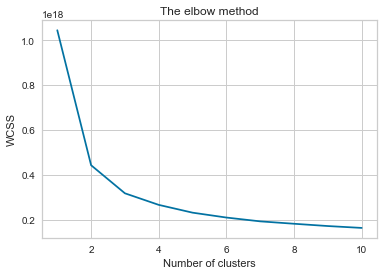

In [349]:
plt.plot(range(1, 11), wcss, 'bx-')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares

### 2-Silhouette

In [350]:
from sklearn.metrics import silhouette_score
avg_silhouette = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df_loan.drop(" loan_status", axis=1))
    cluster_labels = kmeans.labels_
    avg_silhouette.append(silhouette_score(df_loan.drop(" loan_status", axis=1), cluster_labels))

Text(0.5, 1.0, 'Silhouette analysis For Optimal k')

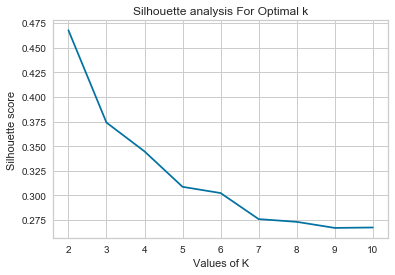

In [351]:
plt.plot(range(2, 11),avg_silhouette, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')

In [352]:
km = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
y = km.fit_predict(df_loan.drop(" loan_status", axis=1))
clusters = km.labels_
score = silhouette_score(df_loan.drop(" loan_status", axis=1), km.labels_)

print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.468


In [353]:
clusters

array([0, 1, 0, ..., 0, 1, 0])

c:\Users\tonya\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


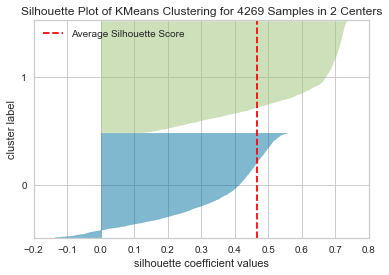

In [354]:
visualizer = SilhouetteVisualizer(km, colors='yellowbrick') #, ax=ax[q-1][mod])
visualizer.fit(df_loan.drop(" loan_status", axis=1))
visualizer.show()


### Clustering visualizer

Note: you may need to restart the kernel to use updated packages.


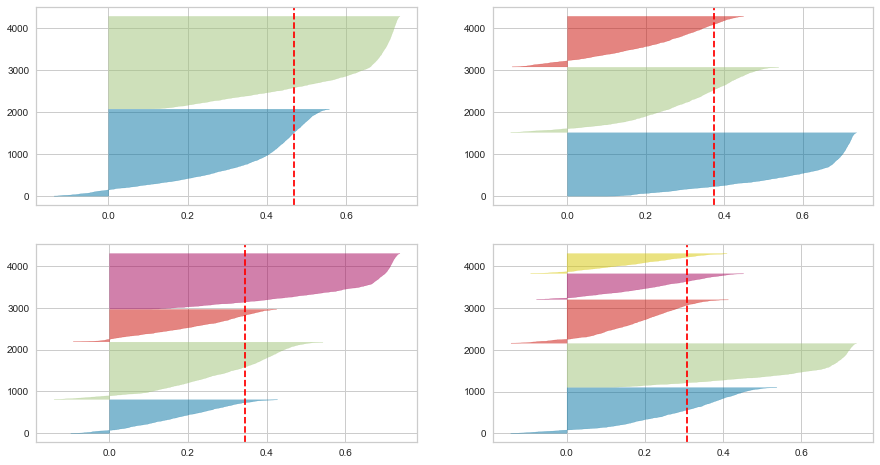

In [355]:
%pip install yellowbrick


from yellowbrick.cluster import SilhouetteVisualizer
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in range(2, 6):
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=0)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df_loan.drop(" loan_status", axis=1))

### David/Dunn

In [356]:
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,cluster
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,0
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,1
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,0
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,0
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,0
5,6,0,1,1,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected,0
6,7,5,1,0,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved,0
7,8,2,1,1,5700000,15000000,20,382,13200000,5700000,11800000,6000000,Rejected,0
8,9,0,1,1,800000,2200000,20,782,1300000,800000,2800000,600000,Approved,1
9,10,5,0,0,1100000,4300000,10,388,3200000,1400000,3300000,1600000,Rejected,1


In [357]:
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,cluster
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,0
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,1
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,0
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,0
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,0
5,6,0,1,1,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected,0
6,7,5,1,0,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved,0
7,8,2,1,1,5700000,15000000,20,382,13200000,5700000,11800000,6000000,Rejected,0
8,9,0,1,1,800000,2200000,20,782,1300000,800000,2800000,600000,Approved,1
9,10,5,0,0,1100000,4300000,10,388,3200000,1400000,3300000,1600000,Rejected,1


In [358]:
# data = df_loan.copy()
# # Assuming you have applied AgglomerativeClustering and obtained cluster labels
# n_clusters = 3  # Replace with the actual number of clusters obtained
# agg_cluster = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
# cluster_labels = agg_cluster.fit_predict(data)

# # Function to calculate Dunn index
# def dunn_index(data, labels):
#     distances = pairwise_distances(data)
#     max_intra_distance = float('-inf')
#     for label in np.unique(labels):
#         cluster_points = data[labels == label]
#         if len(cluster_points) > 1:
#             intra_distance = pairwise_distances(cluster_points).max()
#             if intra_distance > max_intra_distance:
#                 max_intra_distance = intra_distance
    
#     min_inter_distance = float('inf')
#     for i in range(len(labels)):
#         for j in range(i + 1, len(labels)):
#             if labels[i] != labels[j]:
#                 inter_distance = distances[i, j]
#                 if inter_distance < min_inter_distance:
#                     min_inter_distance = inter_distance

#     dunn_index = min_inter_distance / max_intra_distance
#     return dunn_index

# # Calculate Dunn index for your clustering result
# dunn = dunn_index(data.values, cluster_labels)
# print(f"Dunn Index: {dunn}")

# To be removed???
## Clustering data with K-means using k=2 (No PCA)

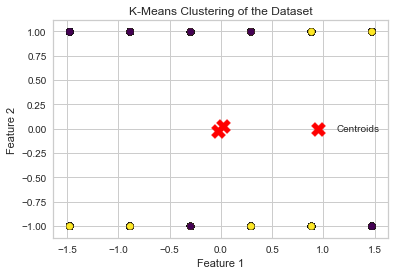

In [359]:

df=df_loan.copy()
# Load your dataset
# Assuming your dataset is stored in a variable named 'df'
# Drop the 'loan_id' and 'loan_status' columns for clustering
X = df.drop(['loan_id', ' loan_status'], axis=1)

# Standardize the features to have zero mean and unit variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply k-means clustering with k=2
kmeans = KMeans(n_clusters=2, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters (assuming two features for simplicity)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['cluster'], cmap='viridis', marker='o', edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering of the Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

### Clustering with k-modes

In [360]:
%pip install kmodes

Note: you may need to restart the kernel to use updated packages.


In [361]:
from kmodes.kmodes import KModes
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(df)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 49046.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 49046.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 49046.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 49046.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 49046.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 753, cost: 45706.0
Run 1, iteration: 2/100, moves: 314, cost: 45706.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 952, cost: 45720.0
Run 2, iteration: 2/

1- Elbow method


Text(0.5, 1.0, 'Elbow Method For Optimal k')

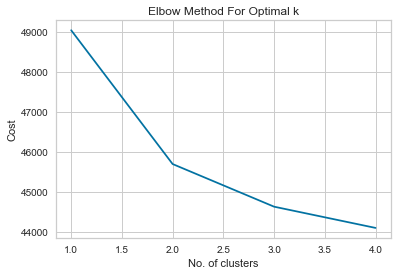

In [362]:
plt.plot(range(1,5), cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')

In [363]:
# Building the model with 2 clusters
kmode = KModes(n_clusters=2, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(df)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 937, cost: 45759.0
Run 1, iteration: 2/100, moves: 14, cost: 45759.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 707, cost: 45921.0
Run 2, iteration: 2/100, moves: 25, cost: 45920.0
Run 2, iteration: 3/100, moves: 0, cost: 45920.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1046, cost: 45730.0
Run 3, iteration: 2/100, moves: 44, cost: 45731.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 748, cost: 45956.0
Run 4, iteration: 2/100, moves: 87, cost: 45948.0
Run 4, iteration: 3/100, moves: 6, cost: 45948.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 880, cost: 45913.0
Run 5, iteration: 2/100, moves: 27, cost: 4591

array([1, 0, 1, ..., 1, 0, 1], dtype=uint16)

## PCA and variance

In [364]:
PCA_df=df.drop(['loan_id', ' loan_status'], axis=1)

In [365]:
PCA_df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,cluster
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0
5,0,1,1,4800000,13500000,10,319,6800000,8300000,13700000,5100000,0
6,5,1,0,8700000,33000000,4,678,22500000,14800000,29200000,4300000,0
7,2,1,1,5700000,15000000,20,382,13200000,5700000,11800000,6000000,0
8,0,1,1,800000,2200000,20,782,1300000,800000,2800000,600000,1
9,5,0,0,1100000,4300000,10,388,3200000,1400000,3300000,1600000,1


In [366]:
pca = PCA()
L_pca = pca.fit_transform(PCA_df)

# Explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Print or use the explained variance ratio
print("Explained Variance Ratio for each component:")
print(explained_variance_ratio)

# Print or use the cumulative explained variance
print("\nCumulative Explained Variance:")
print(cumulative_variance)

Explained Variance Ratio for each component:
[7.94975595e-01 9.65455470e-02 4.79291027e-02 4.50238731e-02
 1.37994812e-02 1.72640048e-03 1.21360932e-10 1.33130435e-13
 1.17368871e-14 1.04580242e-15 9.97129759e-16 2.70396734e-16]

Cumulative Explained Variance:
[0.7949756  0.89152114 0.93945025 0.98447412 0.9982736  1.
 1.         1.         1.         1.         1.         1.        ]


In [367]:
# Assuming you want to retain 95% of the total variance
desired_variance = 0.95

# Find the number of components needed to achieve the desired variance
n_components_needed = np.argmax(cumulative_variance >= desired_variance) + 1

n_components_needed

4

In [368]:
pca = PCA(n_components=n_components_needed)
L_pca = pca.fit_transform(PCA_df)

L_pca

array([[16286355.53542289, 10927825.09833619, -9572120.08210064,
        -3530067.52460218],
       [-8426447.02570329,  2070199.6453716 , -1145443.12883883,
         2414258.86498644],
       [22425774.73078621,  8327052.69951525,  5431599.64335255,
         2973856.87807129],
       ...,
       [ 7485124.58034023,  9182817.81593714, -6680608.23802857,
        -1569084.5247858 ],
       [-2761008.95580469, -1701211.64882197,  3006260.13207626,
         2229148.18987338],
       [28845478.11175885,  -763884.79405665,  2695643.98321674,
        -3320642.69320907]])

1- Kmeans Clustering

In [369]:
Kmean_pca = pd.DataFrame(L_pca, columns=['PC1', 'PC2', 'PC3', 'PC4'])

Kmean_pca.head()

,PC1,PC2,PC3,PC4
0,1.628636e+07,1.092783e+07,-9.572120e+06,-3.530068e+06
1,-8.426447e+06,2.070200e+06,-1.145443e+06,2.414259e+06
2,2.242577e+07,8.327053e+06,5.431600e+06,2.973857e+06
3,1.911028e+07,-4.667135e+06,-6.147467e+05,7.590907e+06
4,1.773673e+07,1.049539e+06,3.249205e+06,-1.729578e+06


In [370]:
k = 2
kmeans = KMeans(n_clusters = k, random_state= 42)
Kmean_pca['cluster'] = kmeans.fit_predict(L_pca)


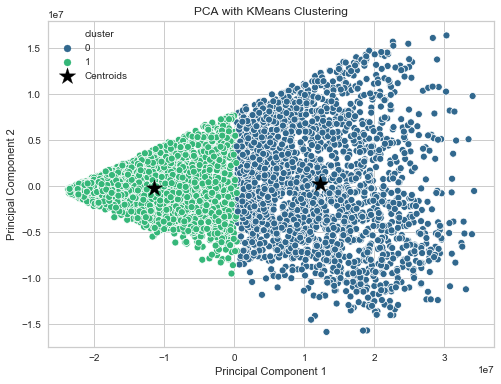

In [371]:

# Plotting the data in the PCA space colored by clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=Kmean_pca, palette='viridis', legend='full')
# Plotting centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300, c='black', label='Centroids')
plt.title('PCA with KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='best')
plt.grid(True)
plt.show()

2-Kmodes Clustering

In [372]:
kmode_pca = pd.DataFrame(L_pca, columns=['PC1', 'PC2', 'PC3', 'PC4'])

kmode_pca.head()

,PC1,PC2,PC3,PC4
0,1.628636e+07,1.092783e+07,-9.572120e+06,-3.530068e+06
1,-8.426447e+06,2.070200e+06,-1.145443e+06,2.414259e+06
2,2.242577e+07,8.327053e+06,5.431600e+06,2.973857e+06
3,1.911028e+07,-4.667135e+06,-6.147467e+05,7.590907e+06
4,1.773673e+07,1.049539e+06,3.249205e+06,-1.729578e+06


In [373]:
k = 2  
kmodes = KModes(n_clusters=k, init='Huang', n_init=5, verbose=1, random_state=42)
kmode_pca['cluster'] = kmodes.fit_predict(L_pca)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 17068.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 17068.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 17068.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 17068.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 17068.0
Best run was number 1


Init: initializing centroids


Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 17068.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 17068.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 17068.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 17068.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 17068.0
Best run was number 1


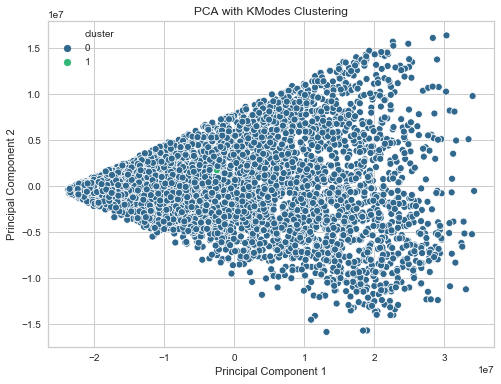

In [374]:
k = 2  
kmodes = KModes(n_clusters=k, init='Huang', n_init=5, verbose=1, random_state=42)
kmode_pca['cluster'] = kmodes.fit_predict(L_pca)


# Plotting the data in the PCA space colored by KModes clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=kmode_pca, palette='viridis', legend='full')

plt.title('PCA with KModes Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='best')
plt.grid(True)
plt.show()

3-Kmedoids Clustering

In [375]:
kmedoids_pca = pd.DataFrame(L_pca, columns=['PC1', 'PC2', 'PC3', 'PC4'])

kmedoids_pca.head()

,PC1,PC2,PC3,PC4
0,1.628636e+07,1.092783e+07,-9.572120e+06,-3.530068e+06
1,-8.426447e+06,2.070200e+06,-1.145443e+06,2.414259e+06
2,2.242577e+07,8.327053e+06,5.431600e+06,2.973857e+06
3,1.911028e+07,-4.667135e+06,-6.147467e+05,7.590907e+06
4,1.773673e+07,1.049539e+06,3.249205e+06,-1.729578e+06


In [376]:
k = 2  
Kmedoids = KMedoids(n_clusters=k, random_state=42)
kmedoids_pca['cluster'] = Kmedoids .fit_predict(L_pca)

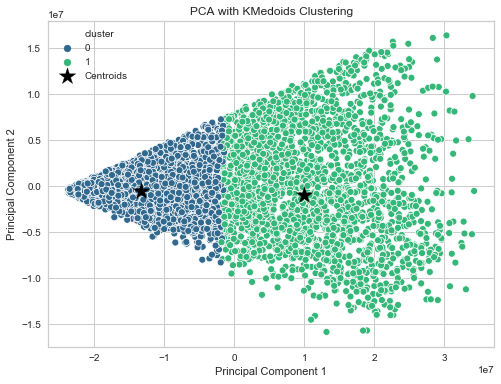

In [377]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=kmedoids_pca, palette='viridis', legend='full')
medoid_indices = Kmedoids.medoid_indices_
medoids = L_pca[medoid_indices]
plt.scatter(medoids[:, 0], medoids[:, 1], marker='*', s=300, c='black', label='Centroids')
plt.title('PCA with KMedoids Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [378]:
hierarchical_df = pd.DataFrame(L_pca, columns=['PC1', 'PC2', 'PC3', 'PC4'])

hierarchical_df.head()

,PC1,PC2,PC3,PC4
0,1.628636e+07,1.092783e+07,-9.572120e+06,-3.530068e+06
1,-8.426447e+06,2.070200e+06,-1.145443e+06,2.414259e+06
2,2.242577e+07,8.327053e+06,5.431600e+06,2.973857e+06
3,1.911028e+07,-4.667135e+06,-6.147467e+05,7.590907e+06
4,1.773673e+07,1.049539e+06,3.249205e+06,-1.729578e+06


In [379]:
n_clusters = 2  
hierarchical = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
cluster_labels = hierarchical.fit_predict(hierarchical_df)
cluster_labels

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

In [380]:
dbscan_df = pd.DataFrame(L_pca, columns=['PC1', 'PC2', 'PC3', 'PC4'])

dbscan_df.head()

,PC1,PC2,PC3,PC4
0,1.628636e+07,1.092783e+07,-9.572120e+06,-3.530068e+06
1,-8.426447e+06,2.070200e+06,-1.145443e+06,2.414259e+06
2,2.242577e+07,8.327053e+06,5.431600e+06,2.973857e+06
3,1.911028e+07,-4.667135e+06,-6.147467e+05,7.590907e+06
4,1.773673e+07,1.049539e+06,3.249205e+06,-1.729578e+06


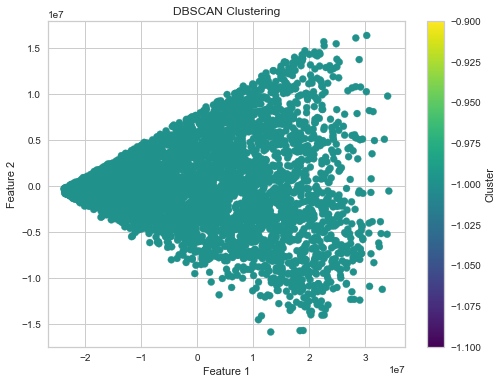

In [387]:
epsilon = 2  # Epsilon (neighborhood distance)
min_samples = 225  # Minimum number of samples in a neighborhood
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
cluster_labels = dbscan.fit_predict(dbscan_df)

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(dbscan_df.iloc[:, 0], dbscan_df.iloc[:, 1], c=cluster_labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()

## Linear Regression